<a href="https://colab.research.google.com/github/Olimjon2005/mac-manzil/blob/main/Copy_of_amaliy_vazifa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Kerakli kutubxonalarni chaqirib olamiz.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [5]:
df = pd.read_csv('/content/house_price_regression_dataset.csv')

In [6]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


#  Square_Footage-Kvadrat metr
# Num_Bedrooms--Yotoq xonalari soni
#Num_Bathrooms-Vannalar soni
#year_built-qurilgan yili
#Lot_Size--lot hajmi
#Garage_Size-garaj hajmi
#Neighborhood_Quality--mahhalla sifati
#House_Price-uy narxi




In [ ]:
df.isnull()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [ ]:
# Nan qiymatlarni har bir ustunda necha foizdan ekanligini aniqlang
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [ ]:
df2=df.dropna()
df2

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [ ]:
# Siz pragnoz qilmoqchi bo'lgan ustuni boshqa ustun malumotlari bilan korelatsiyasini aniqlang va tahlil qiling.
df.corrwith(df["House_Price"])

,0
Square_Footage,0.991261
Num_Bedrooms,0.014633
Num_Bathrooms,-0.001862
Year_Built,0.051967
Lot_Size,0.160412
Garage_Size,0.052133
Neighborhood_Quality,-0.007770
House_Price,1.000000


In [ ]:
# Eng yuqori karilatsiyaga ega ustunni tanlab oling va uning malumotlarini massiv ko'rinishiga o'tkazing
kv_m=df["Square_Footage"].to_numpy()
kv_m

array([1360, 4272, 3592,  966, 4926, 3944, 3671, 3419,  630, 2185, 1269,
       2891, 2933, 1684, 3885, 4617, 3404,  974, 1582, 3058, 2547, 3247,
       1475, 2306,  689, 3234, 3505, 2399, 1767, 2028, 3702, 4056, 4390,
       1146, 3388, 2935, 1100, 2863, 2561,  741, 2541, 3324, 3112, 1863,
       1978, 3056, 1275, 4514,  534, 3652, 2455, 2085, 4443, 3573, 1521,
       3961, 3113, 4343, 2000,  661, 4797, 2481, 1495, 3842, 4298, 1775,
       1516,  837, 1378, 1576, 4493,  879,  992, 2562, 4384,  564, 3068,
       2527, 3195, 1995,  891, 4974, 4061, 2778, 3599,  700, 3604, 2954,
       4145, 1304, 3231, 3273, 2070, 3190, 4340, 1528, 1002, 4993, 1370,
       4988,  706, 1984, 1363, 3290, 1063, 4691, 2257, 2178, 3742, 1559,
       2222, 3814, 3657, 3125, 3229, 2097, 3560, 3193, 4127, 1863, 2481,
       2163, 2029, 2538, 3802, 2737, 1806, 4529, 3175, 1782, 1209, 4913,
       4248, 1163, 2498, 3945, 4243, 1995, 3804, 4263, 2353, 1791, 4081,
       3957, 2136, 4196, 3499, 3652, 1198, 2660, 45

In [ ]:
narx=df["House_Price"].to_numpy()
narx

array([ 262382.85227406,  985260.85449016,  777977.39011858,
        229698.91866361, 1041740.8589249 ,  879796.98352238,
        814427.86140899,  703413.11094468,  173875.03721558,
        504176.50605937,  335332.59275294,  635097.3959198 ,
        701133.80414712,  440726.28481629,  838719.4305035 ,
       1019192.6613592 ,  735850.81234216,  234261.64997474,
        396246.35888875,  672852.051981  ,  586086.56853891,
        740174.01465508,  370167.09090272,  530824.19677521,
        227515.30028798,  652166.14236589,  745670.63714772,
        513161.95119306,  432357.90610274,  434165.89663405,
        809686.20114353,  883819.09112186,  912468.04790467,
        281313.06144485,  705923.31489162,  656980.46042822,
        318266.27713209,  582468.79773652,  541967.63355925,
        188531.42345711,  565562.75043214,  697574.55566703,
        666733.47346169,  376388.02162864,  485380.95019563,
        735678.46220173,  296291.00100751, 1046315.89601366,
        187508.58531168,

In [ ]:
# Kerakli kutubxonalarni chaqirib oling. (vizualizatsiya uchun kerakli kutubxonalar)
# matplotlib va seaborn kutubxonasini chaqirib olamiz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

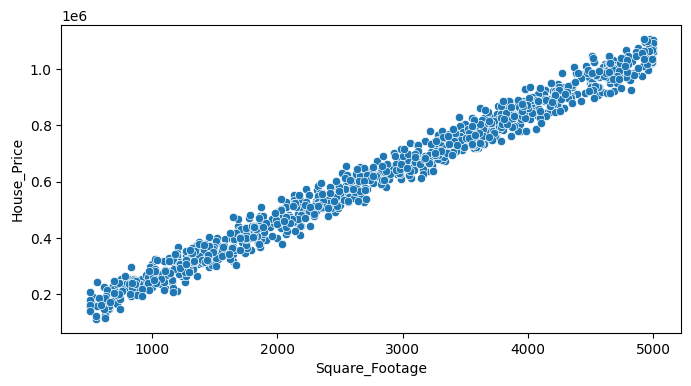

In [ ]:
# visual taxlil qilamiz
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Square_Footage', y='House_Price')
plt.show()

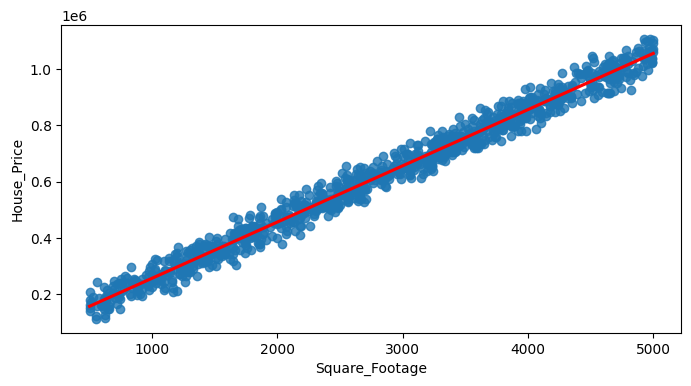

In [ ]:
# regplot line_kws parametiri orqali chiziq tortib ko'ramiz.
plt.figure(figsize=(8,4))
sns.regplot(data=df,x='Square_Footage', y='House_Price', line_kws={"color": "red"})
plt.show()

# Buda Tetta0 va Tetta1 koeffisientlarni yuqoridagi ustun qiymatlaridan foydalangan holda topish. Bunda quydagi formuladan foydalaniladi.

In [ ]:
# Bu yerda X telda X ustuning urtacha qiymati
Xmean=kv_m.mean()
Xmean

2815.422

In [ ]:
# Bu yerda Y telda Y ustuning urtacha qiymati
Ymean=narx.mean()
print(Ymean)

618861.0186467685


In [ ]:
# tetta1 ni topamiz
theta1=sum((kv_m-Xmean)*(narx-Ymean))/sum((kv_m-Xmean)**2)
print(f"{theta1=}")


theta1=200.1985299102317


In [ ]:
# tetta0 ni quymatini ham formulaga asosan topamiz
theta0 = Ymean - theta1*Xmean
print(f"{theta0=}")

theta0=55217.673169844085


In [ ]:
df.shape

(1000, 8)

In [ ]:
# DF ning "size" ustunidan tasodifiy 10 ta qiymatlarni ajratib olamiz va ularning qiymatini massivga utkazamiz.
# sample(), random_state() parametiri bilan tanishish.
# x_train va y_train larni ajratib olamiz.
x_test=df.sample(200,random_state=42)["Square_Footage"].to_numpy()
print(x_test)
y_test=df.sample(200,random_state=42)["House_Price"].to_numpy()
print(y_test)


[4012 2310 4708 4932 3646 3586 4638 4127 3781 4243 3610 3068  780 4925
 2565  885 2186 1705 3332 1376 3456 2294 3316 4137 1945 1454 1984 1909
  917 1981 1080 4263 3531 1394 2131 3608 2103 2581  974  661 1330 1002
 2215 1274 4995 4363 3712 3778 4671 3391 1010 3361 3670 3224 2306 3702
  637 1269 3369  919 4615 1521 1039 2148 2622 2658 1776 3435 4493 3279
 2178 4022 1270 2548 2955 3306 2253  741 2665 4236 2575 1516 2395  837
  504 1424 4723 4017 2173  619 4246 3722 1756 3461 3398 4992 3458 4145
 3842 2836 4235 4006  785 2827 2219 4656 2338  827 1108 4743 3830 1620
 4094 2535 3604 4452  988 4195  857 3450  701 2187 3921 1106 1545 1515
 2323 4077 4376 2690 3314 3097 2800 3261 3203 3961 2481 3057 3234  992
 1978 3620 1563 3509 4007 1466 4518 1459 3097 4642 2469 3755 4742 4266
 4789 3039 1074 3160 4797 3530  735 4177 3617 3093 4951 4623 4347  732
 2991 3761 2979 1010 2222 2055 2310 2257 3065 4776 3212 2406 4768 3787
 1395 1896 2616 1995 1743 2570 2661 1401 2401 2357 4702 4590  753 3767
  616 

In [ ]:
# Bashorat qiymatlar
y_pridect=theta0 +theta1*x_test

arr1 = np.round(y_pridect,decimals = 2)
print(arr1)

[ 858414.18  517676.28  997752.35 1042596.82  785141.51  773129.6
  983738.45  881437.01  812168.31  904660.04  777934.37  669426.76
  211372.53 1041195.43  568726.9   232393.37  492851.66  396556.17
  722279.17  330690.85  747103.79  514473.1   719076.    883438.99
  444603.81  346306.34  452411.56  437396.67  238799.73  451810.96
  271432.09  908664.01  762118.68  334294.42  481840.74  777533.97
  476235.18  571930.08  250211.04  187548.9   321481.72  255816.6
  498657.42  310270.6  1055209.33  928683.86  798354.62  811567.72
  990345.01  734090.89  257418.19  728084.93  789946.28  700657.73
  516875.48  796352.63  182744.14  309269.61  729686.52  239200.12
  979133.89  359719.64  263223.95  485244.12  580138.22  587345.37
  410770.26  742899.62  954709.67  711668.65  491250.07  860416.16
  309469.81  565323.53  646804.33  717074.01  506264.96  203564.78
  588746.76  903258.65  570728.89  358718.64  534693.15  222783.84
  156117.73  340300.38 1000755.33  859415.17  490249.08  179140.

In [ ]:
data={
    "Asil qiymatlar": y_test,
    "Bashorat qiymatlar":arr1
}
df1=pd.DataFrame(data)
df1

,Asil qiymatlar,Bashorat qiymatlar
0,9.010005e+05,858414.18
1,4.945375e+05,517676.28
2,9.494042e+05,997752.35
3,1.040389e+06,1042596.82
4,7.940100e+05,785141.51
...,...,...
195,8.245296e+05,809365.54
196,1.803936e+05,178539.97
197,9.658167e+05,954309.27
198,4.336642e+05,427186.54


In [ ]:
# MAE absolute() metodi
MAE = np.sum(np.absolute(arr1-y_test))/len(y_test)
print(f"{MAE=}")
MAE = np.sum(np.absolute(arr1-y_test))/len(y_test)
MAE

MAE=27178.712885985977


27178.712885985977

In [ ]:
# RMSE (root mean square error) o'rtacha kvadratik xatolik, sqrt() metodi
RMSE = np.sqrt(np.sum((arr1-y_test)**2)/len(y_test))
print(f"{RMSE=}")

RMSE=32858.267267661475


# Scikit-learn yordamida LR

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.20, random_state=42)

In [8]:
train_set.shape

(800, 8)

In [9]:
test_set.shape

(200, 8)

In [10]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

In [27]:
# train_set ni massiv ko'rinishiga o'tkazib olamiz
x_train = np.asanyarray(train_set[['Square_Footage']])
y_train = np.asanyarray(train_set[['House_Price']])
x_train


array([[2028],
       [3519],
       [4507],
       [3371],
       [2871],
       [ 888],
       [ 697],
       [4201],
       [1743],
       [3568],
       [1775],
       [1791],
       [1489],
       [2743],
       [2786],
       [1240],
       [ 802],
       [1743],
       [2490],
       [3209],
       [1353],
       [1346],
       [2698],
       [3652],
       [1036],
       [3592],
       [4636],
       [2179],
       [1454],
       [1167],
       [4570],
       [1887],
       [1824],
       [2168],
       [1146],
       [4056],
       [1718],
       [3554],
       [ 762],
       [3338],
       [ 966],
       [1654],
       [2352],
       [4262],
       [4646],
       [1559],
       [2826],
       [2527],
       [3599],
       [1284],
       [4061],
       [1779],
       [3121],
       [4712],
       [3274],
       [4965],
       [3311],
       [1188],
       [2292],
       [3944],
       [3428],
       [2042],
       [4993],
       [1480],
       [2641],
       [ 626],
       [40

In [28]:
# Modelni o'qitib(tarbiyalab) olamiz
LR_model.fit(x_train, y_train)

LinearRegression()

In [29]:
#theta1 va theta0 koeefisentlarni ajratib olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=200.55687687000562
theta0=54229.058595876675


Text(0, 0.5, 'House_Price')

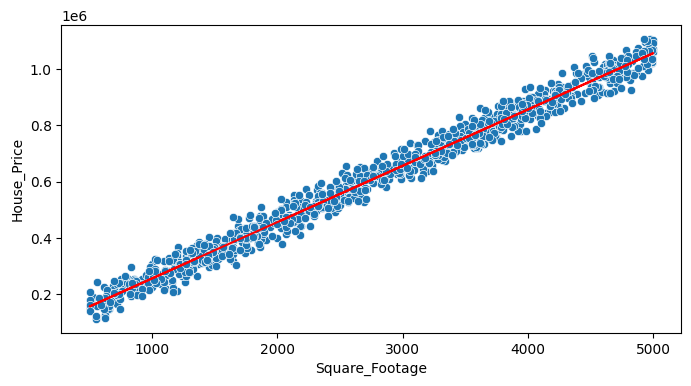

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Square_Footage', y='House_Price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Square_Footage")
plt.ylabel("House_Price")

In [31]:
# test_set ni massiv ko'rinishiga o'tkazib olamiz
x_test = np.asanyarray(train_set[['Square_Footage']])
y_test = np.asanyarray(train_set[['House_Price']])
x_test


array([[2028],
       [3519],
       [4507],
       [3371],
       [2871],
       [ 888],
       [ 697],
       [4201],
       [1743],
       [3568],
       [1775],
       [1791],
       [1489],
       [2743],
       [2786],
       [1240],
       [ 802],
       [1743],
       [2490],
       [3209],
       [1353],
       [1346],
       [2698],
       [3652],
       [1036],
       [3592],
       [4636],
       [2179],
       [1454],
       [1167],
       [4570],
       [1887],
       [1824],
       [2168],
       [1146],
       [4056],
       [1718],
       [3554],
       [ 762],
       [3338],
       [ 966],
       [1654],
       [2352],
       [4262],
       [4646],
       [1559],
       [2826],
       [2527],
       [3599],
       [1284],
       [4061],
       [1779],
       [3121],
       [4712],
       [3274],
       [4965],
       [3311],
       [1188],
       [2292],
       [3944],
       [3428],
       [2042],
       [4993],
       [1480],
       [2641],
       [ 626],
       [40

In [32]:
y_predict = LR_model.predict(x_test)
y_predict

array([[ 460958.40488825],
       [ 759988.70830143],
       [ 958138.90264899],
       [ 730306.29052467],
       [ 630027.85208966],
       [ 232323.56525644],
       [ 194017.20177427],
       [ 896768.49832677],
       [ 403799.6949803 ],
       [ 769815.99526806],
       [ 410217.51504014],
       [ 413426.42507006],
       [ 352858.24825532],
       [ 604356.5718503 ],
       [ 612980.51755571],
       [ 302919.58591468],
       [ 215075.67384562],
       [ 403799.6949803 ],
       [ 553615.68200219],
       [ 697816.07647172],
       [ 325582.51300099],
       [ 324178.6148629 ],
       [ 595331.51239115],
       [ 786662.77292514],
       [ 262005.9830332 ],
       [ 774629.36031294],
       [ 984010.73976522],
       [ 491242.49329562],
       [ 345838.75756486],
       [ 288278.93390317],
       [ 970773.9858918 ],
       [ 432679.88524958],
       [ 420044.80200677],
       [ 489036.36765005],
       [ 284067.2394889 ],
       [ 867687.75118062],
       [ 398785.77305855],
 

In [33]:
y_test

array([[ 434165.89663405],
       [ 788284.69020152],
       [ 985499.19631598],
       [ 736289.12455508],
       [ 636552.75248531],
       [ 215993.8951157 ],
       [ 216591.97111921],
       [ 876992.62965777],
       [ 435500.94479438],
       [ 818706.77643615],
       [ 406069.27091275],
       [ 355281.41848529],
       [ 347769.0613211 ],
       [ 606157.49727133],
       [ 617979.852975  ],
       [ 262398.44604608],
       [ 237185.91326914],
       [ 381738.0175438 ],
       [ 567376.40069465],
       [ 694271.1623038 ],
       [ 354054.70019159],
       [ 351280.41620276],
       [ 571367.82527926],
       [ 793995.28487578],
       [ 238220.48454485],
       [ 777977.39011858],
       [ 985351.02391295],
       [ 443005.62363881],
       [ 369854.92449322],
       [ 219652.59801356],
       [ 972537.49646742],
       [ 439793.07800824],
       [ 427947.10309738],
       [ 465144.07194172],
       [ 281313.06144485],
       [ 883819.09112186],
       [ 424712.55125248],
 

In [34]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=26932.237953610675
RMSE=33570.777762727186
